In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm

import skimage

import brainscore
from brainscore.assemblies import walk_coords,split_assembly
from brainscore.assemblies import split_assembly
from brainscore.metrics import Score

from brainio_base.assemblies import DataAssembly

In [12]:
neural_data = brainscore.get_assembly(name="dicarlo.Majaj2015")
neural_data.load()
stimulus_set = neural_data.attrs['stimulus_set']

/home/elijahc/.pyenv/versions/fastai/lib/python3.6/site-packages/brainio_base/assemblies.py:213: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [13]:
# stimulus_set = pd.DataFrame.from_records(stimulus_set.to_records()).drop(columns=['index'])

In [14]:
# stimulus_set[['variation','object_name','category_name','ty','tz','size']].to_csv('../data/dicarlo_images/stimulus_set.csv',index=False)

In [15]:
img_ids = stimulus_set['image_id']
img_paths = [stimulus_set.get_image(iid) for iid in img_ids]
%matplotlib inline


In [16]:
len(img_paths)

5760

In [17]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [18]:
def preprocess_img(img,scale=0.5,im_sz=(54,54)):
    pimg = skimage.transform.rescale(img,scale=scale)
    pimg = crop_center(pimg,im_sz[0],im_sz[1])
    return pimg

In [20]:
stimulus_set.groupby('variation').count()

,id,image_id,image_file_name,object_name,category_name,background_id,ty,tz,rxy,rxz,ryz,rxy_semantic,rxz_semantic,ryz_semantic,size,s,degrees
variation,,,,,,,,,,,,,,,,,
0,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640
3,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560
6,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560


In [9]:
medium_imgs = [preprocess_img(image.imread(ipath)[:,:,0],im_sz=(106,106)) for ipath in tqdm(img_paths)]
medium_imgs = np.stack(medium_imgs)
np.save('../data/dicarlo_images/med_imgs_106x106',medium_imgs)

  0%|          | 0/5760 [00:00<?, ?it/s]/home/elijahc/.pyenv/versions/fastai/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
100%|██████████| 5760/5760 [01:32<00:00, 62.02it/s]


In [10]:
sm_imgs = np.stack([preprocess_img(image.imread(ipath)[:,:,0],scale=0.27,im_sz=(56,56)) for ipath in tqdm(img_paths)])
np.save('../data/dicarlo_images/sm_imgs_56x56',sm_imgs)

100%|██████████| 5760/5760 [00:48<00:00, 119.66it/s]


In [3]:

sm_imgs = np.load('../data/dicarlo_images/sm_imgs_56x56.npy')

In [4]:
sm_imgs.shape

(5760, 56, 56)

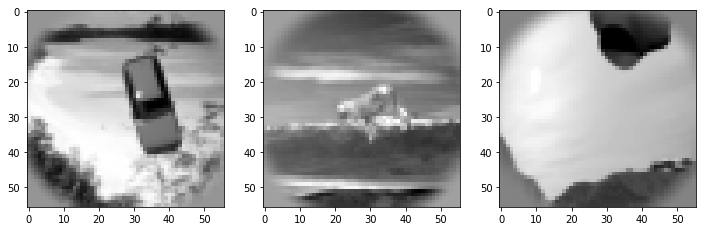

In [11]:
idx = np.random.choice(np.arange(5760),size=3)
fig,axs = plt.subplots(1,3,figsize=(12,4))

simple_idx = 0

# axs[0].imshow(image.imread(img_paths[idx]),cmap='gray')
# axs[1].imshow(medium_imgs[idx],cmap='gray')
axs[0].imshow(sm_imgs[idx[0]],cmap='gray')
axs[1].imshow(sm_imgs[idx[1]],cmap='gray')
axs[2].imshow(sm_imgs[idx[2]],cmap='gray')

In [12]:
# stimulus_set.to_parquet('../data/dicarlo_images/stimulus_set.parquet')